In [1]:
# Step 1: Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [2]:
# Step 2: Load the dataset
df = pd.read_csv(r'C:\Users\pallavi\Documents\intrenship\Task1\titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# Step 3: Basic data info
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
# Step 4: Check for missing values
df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
# Step 5: Handle missing values
df['Age'] = df['Age'].fillna(df['Age'].median())
df.drop(columns='Cabin', inplace=True)
df.dropna(inplace=True)


In [16]:
# Step 6: Convert categorical variables into dummy/indicator variables
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

In [20]:
# Step 7: Select features and label
X = df[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S']]
y = df['Survived']

In [22]:
# Step 8: Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [24]:
# Step 9: Train Logistic Regression model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)


LogisticRegression(max_iter=200)

In [28]:
# Step 10: Make predictions
y_pred = model.predict(X_test)


In [30]:
# Step 11: Evaluate model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.7808988764044944

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.78      0.81       109
           1       0.69      0.78      0.73        69

    accuracy                           0.78       178
   macro avg       0.77      0.78      0.77       178
weighted avg       0.79      0.78      0.78       178


Confusion Matrix:
 [[85 24]
 [15 54]]


In [34]:
# Step 12: Predict on a custom sample (fixed)
sample_data = pd.DataFrame([[3, 22, 0, 0, 7.25, 1, 0, 1]],
                           columns=['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S'])

print("Prediction (0=Not Survived, 1=Survived):", model.predict(sample_data))

Prediction (0=Not Survived, 1=Survived): [0]


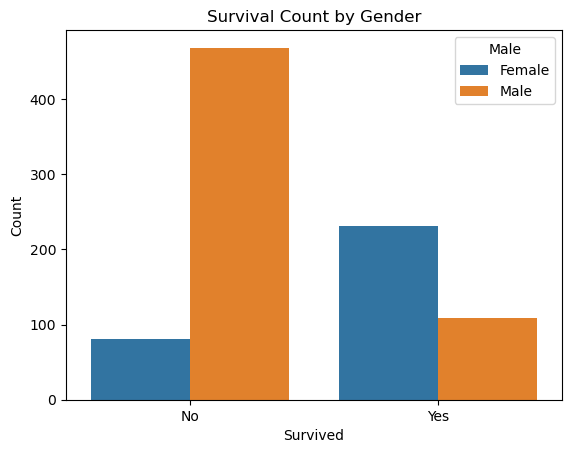

In [36]:
#step 13: Optional Plot: Survival by Gender
sns.countplot(x='Survived', hue='Sex_male', data=df)
plt.title("Survival Count by Gender")
plt.xlabel("Survived")
plt.ylabel("Count")
plt.xticks([0, 1], ["No", "Yes"])
plt.legend(title='Male', labels=["Female", "Male"])
plt.show()


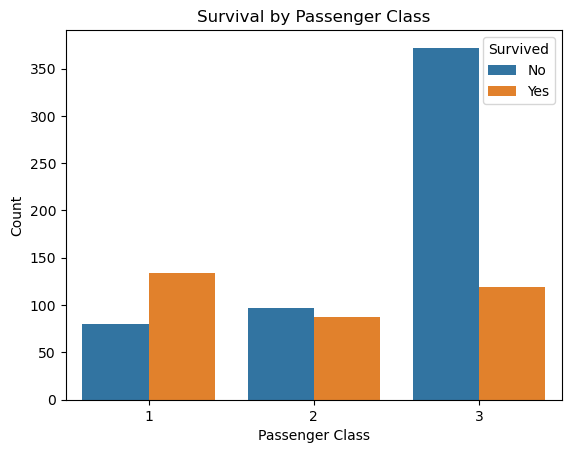

In [38]:
#Plot: Survival by Passenger Class
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title("Survival by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Count")
plt.legend(title="Survived", labels=["No", "Yes"])
plt.show()


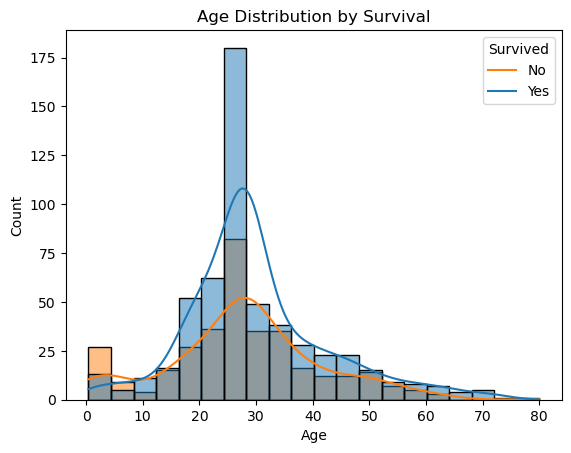

In [40]:
#Plot: Age Distribution by Survival
sns.histplot(data=df, x='Age', hue='Survived', bins=20, kde=True)
plt.title("Age Distribution by Survival")
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend(title="Survived", labels=["No", "Yes"])
plt.show()


In [42]:
import joblib

# Save model to file
joblib.dump(model, 'titanic_model.pkl')

# To load later:
# model = joblib.load('titanic_model.pkl')


['titanic_model.pkl']

In [46]:
#Step 15: Try a Better Model — Random Forest
from sklearn.ensemble import RandomForestClassifier

# Create and train
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate
rf_pred = rf_model.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report

print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print("\nClassification Report:\n", classification_report(y_test, rf_pred))


Random Forest Accuracy: 0.7696629213483146

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.78      0.81       109
           1       0.68      0.75      0.72        69

    accuracy                           0.77       178
   macro avg       0.76      0.77      0.76       178
weighted avg       0.78      0.77      0.77       178



In [48]:
#Step 16: Export the predictions (optional)
# Add predictions to test data
output_df = X_test.copy()
output_df['Actual_Survived'] = y_test.values
output_df['Predicted_Survived'] = rf_pred

# Save to CSV
output_df.to_csv('titanic_rf_predictions.csv', index=False)


In [50]:
pip install streamlit

Note: you may need to restart the kernel to use updated packages.


In [52]:
# titanic_app.py

import streamlit as st
import numpy as np
import pandas as pd
import joblib

# Load saved model
model = joblib.load('titanic_model.pkl')

st.title("🚢 Titanic Survival Prediction")

# Input features
pclass = st.selectbox("Passenger Class (1 = 1st, 2 = 2nd, 3 = 3rd)", [1, 2, 3])
age = st.slider("Age", 0, 80, 25)
sibsp = st.number_input("Number of Siblings/Spouses Aboard", 0, 10, 0)
parch = st.number_input("Number of Parents/Children Aboard", 0, 10, 0)
fare = st.slider("Fare Paid", 0.0, 600.0, 50.0)

# Gender
sex = st.radio("Gender", ["Male", "Female"])
sex_male = 1 if sex == "Male" else 0

# Embarked location
embarked = st.selectbox("Port of Embarkation", ["S", "Q", "C"])
embarked_Q = 1 if embarked == "Q" else 0
embarked_S = 1 if embarked == "S" else 0

# Prepare input sample
sample = np.array([[pclass, age, sibsp, parch, fare, sex_male, embarked_Q, embarked_S]])

# Predict
if st.button("Predict Survival"):
    pred = model.predict(sample)[0]
    result = "🎉 Survived!" if pred == 1 else "💀 Did Not Survive"
    st.subheader(f"Prediction: {result}")


2025-07-06 15:10:41.552 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-06 15:10:42.051 
  command:

    streamlit run C:\Users\pallavi\Anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-07-06 15:10:42.052 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-06 15:10:42.053 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-06 15:10:42.053 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-06 15:10:42.054 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-06 15:10:42.055 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-06 15:10:42.057 Session state does no

In [54]:
#Step 18: Compare Multiple Models
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC()
}

for name, m in models.items():
    m.fit(X_train, y_train)
    score = m.score(X_test, y_test)
    print(f"{name} Accuracy: {score:.4f}")


Logistic Regression Accuracy: 0.7809
Random Forest Accuracy: 0.7697
Decision Tree Accuracy: 0.7584
KNN Accuracy: 0.6854
SVM Accuracy: 0.6854


In [56]:
#Step 19: Export Your Notebook as PDF/HTML
jupyter nbconvert Titanic_Model.ipynb --to pdf


SyntaxError: invalid syntax (1358253810.py, line 2)